<img src="https://raw.githubusercontent.com/brazil-data-cube/rstac/master/inst/extdata/img/logo.png" align="right" width="110" />
<img src="https://brazil-data-cube.github.io/tech-talks/_static/logo-bdc-techtalks.png" align="right" width="150" />

#  rstac 

**R Client Library for SpatioTemporal Asset Catalog (rstac)**

Rolf Simões, Felipe Carvalho, Gilberto Ribeiro, Karine Reis, Matheus Zaglia

Avaliable on: [https://github.com/brazil-data-cube/rstac](https://github.com/brazil-data-cube/rstac)

<hr style="border: 1px solid #0984e3;">

## Sumário

- [**Sobre o `rstac`**](#about-0)
- [**1. Primeiros passos**](#sec-1-1)
    - [**1.1 Instalação do `rstac`**](#sec-1-1)
    - [**1.2 Importação dos pacotes**](#sec-1-2)
- [**2. Consultas**](#sec-2)
- [**3. Requisições**](#sec-3)
- [**4. Documentos**](#sec-4)
- [**5. Funções de itens**](#sec-5)
- [**6. Baixando assets**](#sec-6)
- [**7. Extendendo o `rstac`**](#sec-7)
- [**8. Referências**](#sec-8)



<hr style="border: 1px solid #0984e3;">

## Sobre o `rstac` <a id="about-0"></a>

<img src="img/rstac_new_diagram_00.png" align="right" width="600" />
<br>

<p style="text-align:left">
O pacote rstac foi concebido para suportar totalmente as versões 0.8.1 e v0.9.0 do STAC. Como as especificações STAC estão evoluindo rapidamente, planeamos atualizar o rstac para apoiar a próxima versão STAC 1.0.0 em breve.

Além de suportar os endpoints fornecidos pela especificação STAC, o pacote rstac fornece diversas funções auxiliares.  
    
<p style="text-align:left">

<hr style="border: 1px solid #0984e3;">

## 1. Primeiros passos  <a id="sec-1"></a>

### 1.1 Instalação do pacote   <a id="sec-1-1"></a>

In [60]:
# load necessary libraries
library(devtools)
#install_github("brazil-data-cube/rstac")

# when the package is available on CRAN
# install.packages("rstac")

### 1.2 Importação dos pacotes <a id="sec-1-2"></a>

In [95]:
library(rstac)    # Pacote rstac
library(magrittr) # Pacote para uso do operador %>%
library(magick)   # Pacote para trabalhar com imagens

##  2. Criação das consultas <a id="sec-2"></a>

<img src="img/diagram_01_01.png" align="right" width="500" />

Nesta seção, vamos criar algumas consultas usando as funções do pacote `rstac`. O pacote `rstac` implementa um objeto pai para criar as consultas, assim, podemos trabalhar em um nível de abstração maior. Desta forma, para verificar a classe de um objeto em R, use `class()`. Caso queira ver informações sobre o objeto criado, use `print()`.

In [62]:
s_obj <- stac("http://brazildatacube.dpi.inpe.br/dev/bdc-stac/")

s_obj

### STAC

- url: "http://brazildatacube.dpi.inpe.br/dev/bdc-stac/"
- endpoint: "/"
- version: "0.9.0"
- headers: 
- params: 

In [63]:
s_obj %>% collections()

### STAC

- url: "http://brazildatacube.dpi.inpe.br/dev/bdc-stac/"
- endpoint: "/collections"
- version: "0.9.0"
- headers: 
- params: 

In [64]:
s_obj %>% collections("S2_10-1")

### STAC

- url: "http://brazildatacube.dpi.inpe.br/dev/bdc-stac/"
- endpoint: "/collections/S2_10-1"
- version: "0.9.0"
- headers: 
- params: 
  - collection_id: "S2_10-1"

In [65]:
s_obj %>% collections("S2_10-1") %>% items()

### STAC

- url: "http://brazildatacube.dpi.inpe.br/dev/bdc-stac/"
- endpoint: "/collections/S2_10-1/items"
- version: "0.9.0"
- headers: 
- params: 
  - collection_id: "S2_10-1"

In [66]:
s_obj %>% collections("S2_10-1") %>% items(feature_id = "S2_10_v1_089096_2019-12-31")

### STAC

- url: "http://brazildatacube.dpi.inpe.br/dev/bdc-stac/"
- endpoint: "/collections/S2_10-1/items/S2_10_v1_089096_2019-12-31"
- version: "0.9.0"
- headers: 
- params: 
  - collection_id: "S2_10-1"
  - feature_id: "S2_10_v1_089096_2019-12-31"

In [67]:
s_obj %>% stac_search(collections = c("CB4_64_16D_STK", "S2_10-1"))

### STAC

- url: "http://brazildatacube.dpi.inpe.br/dev/bdc-stac/"
- endpoint: "/search"
- version: "0.9.0"
- headers: 
- params: 
  - collections: "CB4_64_16D_STK", "S2_10-1"

In [68]:
s_obj %>% stac_search(collections = c("CB4_64_16D_STK", "S2_10-1")) %>% extension_query("bdc:tile" == "022024")

### STAC

- url: "http://brazildatacube.dpi.inpe.br/dev/bdc-stac/"
- endpoint: "/stac/search"
- version: "0.9.0"
- headers: 
- params: 
  - collections: "CB4_64_16D_STK", "S2_10-1"
  - query: 
    - bdc:tile: 
      - eq: "022024"

## 3. Requisição <a id="sec-3"></a>

<img src="https://raw.githubusercontent.com/OldLipe/exemplo_rstac/master/img/diagram_01_02.png?token=AG4KQSTIMYW6ZKDFQ6JODUK7MRH2S" align="right" width="500" />


Nesta seção, vamos apresentar como criar requisições a partir dos objetos do `rstac`. O pacote `rstac`, suporta, por enquanto, os métodos HTTP **GET** e **POST**. Com as futuras atualizações da especificações do STAC, pretende-se suportar outros métodos, tais quais **PUT** e **DELETE**. Além disso, é possível realizar requisições através de TOKENS, como será demonstrado nos exemplos.
    

#### 3.1 HTTP GET : `get_request()`

In [69]:
s_obj %>% 
    stac_search(collections = c("CB4_64_16D_STK", "S2_10-1")) %>% 
    get_request()

### STAC Item Collection
- type: "FeatureCollection"
- numberMatched: 4026
- features:
  - - collection: "S2_10-1"
    - bbox: xmin: -46.54095, ymin: -12.02552, xmax: -44.94745, ymax: -11.00356
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.51365, ymin: -13.00330, xmax: -44.91419, ymax: -11.98130
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.48614, ymin: -13.98123, xmax: -44.88069, ymax: -12.95891
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.45842, ymin: -14.95961, xmax: -44.84694, ymax: -13.93666
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -44.94745, ymin: -12.95891, xmax: -43.34282, ymax: -11.92871
    - datetime: "2019-12-31T00:00:00"
> … with 5 more feature(s)

#### 3.2 HTTP POST : `post_request()`

In [70]:
s_obj %>% 
    stac_search(collections = c("CB4_64_16D_STK", "S2_10-1")) %>%
    post_request()

### STAC Item Collection
- type: "FeatureCollection"
- numberMatched: 4026
- features:
  - - collection: "S2_10-1"
    - bbox: xmin: -46.54095, ymin: -12.02552, xmax: -44.94745, ymax: -11.00356
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.51365, ymin: -13.00330, xmax: -44.91419, ymax: -11.98130
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.48614, ymin: -13.98123, xmax: -44.88069, ymax: -12.95891
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.45842, ymin: -14.95961, xmax: -44.84694, ymax: -13.93666
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -44.94745, ymin: -12.95891, xmax: -43.34282, ymax: -11.92871
    - datetime: "2019-12-31T00:00:00"
> … with 5 more feature(s)

#### 3.3 HTTP Access Token (OAuth2)

Access token via POST

In [71]:
s_obj %>% 
    stac_search(collections = c("CB4_64_16D_STK", "S2_10-1")) %>%
    post_request(add_headers("x-api-key" = "MY"))

### STAC Item Collection
- type: "FeatureCollection"
- numberMatched: 4026
- features:
  - - collection: "S2_10-1"
    - bbox: xmin: -46.54095, ymin: -12.02552, xmax: -44.94745, ymax: -11.00356
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.51365, ymin: -13.00330, xmax: -44.91419, ymax: -11.98130
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.48614, ymin: -13.98123, xmax: -44.88069, ymax: -12.95891
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.45842, ymin: -14.95961, xmax: -44.84694, ymax: -13.93666
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -44.94745, ymin: -12.95891, xmax: -43.34282, ymax: -11.92871
    - datetime: "2019-12-31T00:00:00"
> … with 5 more feature(s)

##  4. Documento <a id="sec-4"></a>

<img src="img/diagram_01_03.png" align="right" width="500" />


Por fim, nesta seção, vamos apresentar os diferentes tipos de visualizações dispobilizadas pelo `rstac`. Após a requição, etapa vista acima, cada objeto filho do `rstac` é mapeado em sua classe, desta forma, possui um tipo diferente de visualização. Para visualizar os atributos dos objetos use `$`, por exemplo, `meu_objeto$meu_atributo`. Outra característica interessante, é o formato da saída dos objetos, pois para facilitar seu entendimento é disponibilizado em **Markdown**.

#### 4.1 Objeto `STACCatalog` 

In [72]:
s_obj %>% get_request()

### STAC Catalog
- stac_version: "0.9.0"
- id: "bdc"
- description: "Brazil Data Cube Catalog"
- links:
  - L7DN 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/L7DN-1)
  - L7SR 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/L7SR-1)
  - Sentinel-2 (MSI) Cube Identity - v001 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/S2_10-1)
  - CBERS-4 (AWFI) Cube Stack 16 days - v001 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/CB4_64_16D_STK-1)
  - CBERS-4 (AWFI) Cube Identity - v001 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/CB4_64-1)
  - HLS.L30 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/HLS.L30-1)
  - HLS.S30 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/HLS.S30-1)
  - L5DN 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/L5DN-1)
  - L5SR 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/L5SR-1)
  - Landsat-8 (OLI) Cube Stack 16 days - v001 
(http://brazildatacube

#### 4.2 Objeto `STACItemCollection`

In [73]:
s_obj %>% 
    stac_search(collections = c("CB4_64_16D_STK", "S2_10-1")) %>% 
    get_request()

### STAC Item Collection
- type: "FeatureCollection"
- numberMatched: 4026
- features:
  - - collection: "S2_10-1"
    - bbox: xmin: -46.54095, ymin: -12.02552, xmax: -44.94745, ymax: -11.00356
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.51365, ymin: -13.00330, xmax: -44.91419, ymax: -11.98130
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.48614, ymin: -13.98123, xmax: -44.88069, ymax: -12.95891
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.45842, ymin: -14.95961, xmax: -44.84694, ymax: -13.93666
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -44.94745, ymin: -12.95891, xmax: -43.34282, ymax: -11.92871
    - datetime: "2019-12-31T00:00:00"
> … with 5 more feature(s)

In [74]:
s_obj %>% 
    collections("S2_10-1") %>%
    items() %>% 
    get_request()

### STAC Item Collection
- type: "FeatureCollection"
- numberMatched: 4026
- features:
  - - collection: "S2_10-1"
    - bbox: xmin: -46.54095, ymin: -12.02552, xmax: -44.94745, ymax: -11.00356
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.51365, ymin: -13.00330, xmax: -44.91419, ymax: -11.98130
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.48614, ymin: -13.98123, xmax: -44.88069, ymax: -12.95891
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -46.45842, ymin: -14.95961, xmax: -44.84694, ymax: -13.93666
    - datetime: "2019-12-31T00:00:00"
  - - collection: "S2_10-1"
    - bbox: xmin: -44.94745, ymin: -12.95891, xmax: -43.34282, ymax: -11.92871
    - datetime: "2019-12-31T00:00:00"
> … with 5 more feature(s)

#### 4.3  Objeto `STACFeature`

In [75]:
s_obj %>% 
    collections("S2_10-1") %>%
    items(feature_id = "S2_10_v1_089096_2019-12-31") %>% 
    get_request()

### STAC Item
- stac_version: "0.9.0"
- id: "S2_10_v1_089096_2019-12-31"
- bbox: xmin: -46.54095, ymin: -12.02552, xmax: -44.94745, ymax: -11.00356
- properties:
  - bdc:tile: "089096"
  - datetime: "2019-12-31T00:00:00"
  - start_datetime: "2019-12-31T00:00:00"
  - end_datetime: "2019-12-31T00:00:00"
  - created: "2020-09-08T19:25:25"
  - updated: "2020-09-08T19:25:25"
  - eo:gsd: 10.00000
  - eo:bands:     - - name: "band1"
      - common_name: "coastal"
      - description: null
      - min: 0.00000
      - max: 10000.00000
      - nodata: -9999.00000
      - scale: 0.00010
      - center_wavelength: null
      - full_width_half_max: null
      - data_type: "int16"
    - - name: "band11"
      - common_name: "swir1"
      - description: null
      - min: 0.00000
      - max: 10000.00000
      - nodata: -9999.00000
      - scale: 0.00010
      - center_wavelength: null
      - full_width_half_max: null
      - data_type: "int16"
    - - name: "band12"
      - common_name: "swir2"
   

#### 4.4 Objeto `STACCollection` 

In [76]:
s_obj %>% 
    collections("S2_10-1") %>%
    get_request()

### STAC Collection
- stac_version: "0.9.0"
- id: "S2_10-1"
- license: ""
- extent: 
  - spatial: 
    - bbox: 
      - xmin: -61.78617, ymin: -17.01636, xmax: -43.26395, ymax: 2.82723
  - temporal: 
    - interval: 
      - "2017-01-04T00:00:00/2019-12-31T00:00:00"
- properties:
  - eo:gsd: 10.00000
  - eo:bands:     - - name: "band1"
      - common_name: "coastal"
      - description: null
      - min: 0.00000
      - max: 10000.00000
      - nodata: -9999.00000
      - scale: 0.00010
      - center_wavelength: null
      - full_width_half_max: null
      - data_type: "int16"
    - - name: "band11"
      - common_name: "swir1"
      - description: null
      - min: 0.00000
      - max: 10000.00000
      - nodata: -9999.00000
      - scale: 0.00010
      - center_wavelength: null
      - full_width_half_max: null
      - data_type: "int16"
    - - name: "band12"
      - common_name: "swir2"
      - description: null
      - min: 0.00000
      - max: 10000.00000
      - nodata: -9999.0

#### 4.5 `STACCollectionList` object

In [77]:
s_obj %>% 
    collections() %>%
    get_request()

### STAC List Collection
- S2TOA-1 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/S2TOA-1)
- S2_MSI_L2_SR_LASRC-1 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/S2_MSI_L2_SR_LASRC-1)
- HLS.S30-1 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/HLS.S30-1)
- HLS.L30-1 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/HLS.L30-1)
- LC8DN-1 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/LC8DN-1)
- LC8SR-1 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/LC8SR-1)
- L5SR-1 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/L5SR-1)
- L5DN-1 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/L5DN-1)
- L7SR-1 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/L7SR-1)
- L7DN-1 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/L7DN-1)
- MYD13Q1-1 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/collections/MYD13Q1-1)
- MOD13Q1-1 
(http://brazildatacube.dpi.inpe.br/dev/bdc-stac/coll

## 5. Funções de itens  <a id="sec-5"></a>


Os objetos do tipo `stac_item_collection` possuem algumas funções facilitadoras para manipular/extrair informações deste objeto, sendo elas:


- **`item_fetch()`:** Realiza a paginação dos assets
- **`item_length()`:** Retorna a quantidade de itens em um objeto
- **`item_matched()`:** Retorna a quantidade de itens corresponderam aos critérios de pesquisa

#### 5.1 `items_fetch()`

In [78]:
s_obj %>% 
    stac_search(collections = "CB4_64-1",
                limit = 500) %>%
    get_request() %>% 
    items_fetch()

ERROR: Error: HTTP status '404'. The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.


#### 5.2 `item_length()`

In [ ]:
s_obj %>% 
    stac_search(collections = "CB4_64-1",
                limit = 500) %>%
    get_request() %>%
    items_length()

#### 5.3 `items_matched()`

In [ ]:
s_obj %>% 
    stac_search(collections = "CB4_64-1",
                limit = 500) %>%
    get_request() %>%
    items_matched()

## 6. Download de assets <a id="sec-6"></a>

Além das funções mencionadas acima, é possível realizar o *dowload* de todos os *assets* retornados de uma pesquisa. Para isso, pode ser usado o método: `assets_download()`. Como apresentado na célula abaixo.

In [ ]:
s_obj %>%
    collections(collection_id = "CB4_64_16D_STK-1") %>%
    items(limit = 2) %>%
    get_request() %>%
    assets_download(assets_name = c("thumbnail"), output_dir = ".", headers = c("x-api-key" = "MY"))

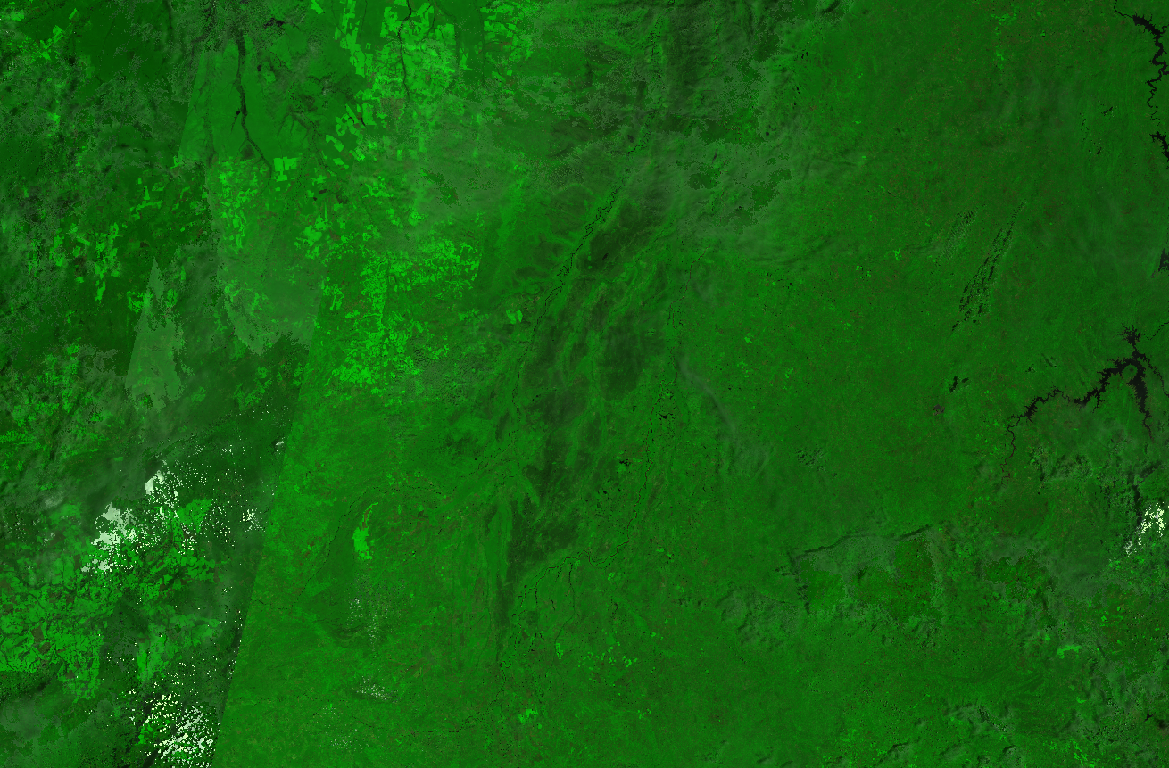

  format width height colorspace matte filesize density
1    PNG  1169    768       sRGB  TRUE  1772493   72x72


In [94]:
cb4_64 <- magick::image_read('CB4_64_16D_STK_021024_2019-12-19_2019-12-31_thumbnail.png')
print(cb4_64)

## 7. Estendendo o pacote `rstac` <a id="sec-7"></a>


<img src="img/diagram_01_04_ext_new.png" align="right" width="500" />


Por fim, nesta seção, vamos falar um pouco de como criar novas extensões baseadas na API STAC no pacote `rstac`. Para criar uma extensão no `rstac`, basta implementar seu métodos de extensão e as seguintes interfaces:

- `params_get_request` e `params_post_request`
    - para manipular os atributos de seu objeto antes da requisição;  
- `content_get_response` e `content_get_response` 
    - para manipular os atributos após a requisição.

In [ ]:
# Criado uma função de estensão
my_extension <- function(s, token = "") {
    
    class(s) <- c("my_extension", "stac")
    s$headers <- c("x-api-key" = token)
    
    return(s)
}

# Implementando a interface: params_get_request
params_get_request.my_extension <- function(s) {
   
    s$headers <- paste0(s$headers, "-MY_EXTENSION")
    print(paste("HTTP GET x-api-key:",s$headers))
    
    return(s$params)
}

# Implementando a interface: content_get_response
content_get_response.my_extension <- function(s, res) {    
    
    content <- structure(
        httr::content(res,
                           type = c("application/json"),
                           encoding = "UTF-8",
                           simplifyVector = TRUE,
                           simplifyDataFrame = FALSE,
                           simplifyMatrix = FALSE),
        stac = s,
        request = list(method = "get"),
        class = "stac_item_collection")
    
    
    return(content)
}

In [ ]:
s_obj %>% 
    stac_search(collections = c("CB4_64_16D_STK-1", "LC8SR-1")) %>% 
    my_extension("MY_TOKEN") %>% 
    get_request()

## Referências <a id="sec-8"></a>

- [1] https://stacspec.org/
- [2] https://github.com/brazil-data-cube/stac.py